In [57]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.insert(0, "../")

import motiflets.motiflets as ml
from motiflets.competitors import *
import motiflets.plotting as ml_plt

import subprocess
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
df1 = pd.read_csv("../tests/results/motion_precision.csv", index_col=0)
df2 = pd.read_csv("../tests/results/birdsounds_precision.csv", index_col=0)
df3 = pd.read_csv("../tests/results/soundtracks_precision.csv", index_col=0)
df4 = pd.read_csv("../tests/results/audio_precision.csv", index_col=0)
df = pd.concat([df1, df2, df3, df4])
df.reset_index(inplace=True, drop=True)
df

,Dataset,Method,Precision,Recall
0,Boxing,mStamp,1.000000,0.200000
1,Boxing,LAMA,0.900000,0.900000
2,Boxing,EMD*,0.800000,0.800000
3,Boxing,K-Motifs (TOP-N),0.700000,0.700000
4,Boxing,K-Motifs (all),0.700000,0.600000
5,Swordplay,mStamp,0.000000,0.000000
6,Swordplay,LAMA,1.000000,1.000000
7,Swordplay,EMD*,0.000000,0.000000
8,Swordplay,K-Motifs (TOP-N),0.166667,0.166667
9,Swordplay,K-Motifs (all),0.000000,0.000000


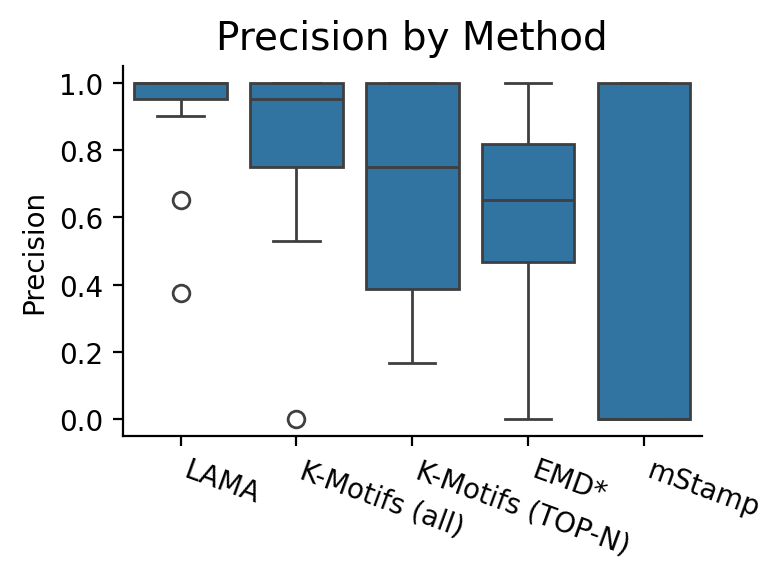

In [65]:
# df.Method[df.Method == "Set Finder"] = "SF"
# df.Method[df.Method == "EMMA"] = "EMMA"

fig, ax = plt.subplots(figsize=(4,3))
sns.boxplot(x=df.Method, y=df.Precision, ax=ax, 
            order=df[["Method", "Precision"]].groupby("Method").mean().sort_values(by="Precision", ascending=False).reset_index()["Method"])
ax.set_title("Precision by Method", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(rotation=-20, fontsize=10, ha='left')
plt.xlabel("")
sns.despine()
plt.tight_layout()
plt.savefig("../tests/results/images/boxplot_precision.pdf")

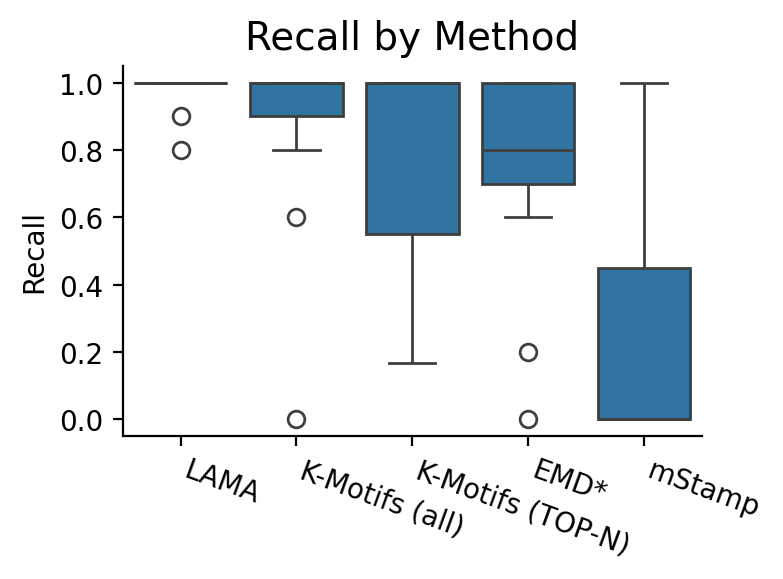

In [66]:
fig, ax = plt.subplots(figsize=(4,3))
sns.boxplot(x=df.Method, y=df.Recall, ax=ax, 
            order=df[["Method", "Recall"]].groupby("Method").mean().sort_values(by="Recall", ascending=False).reset_index()["Method"])
ax.set_title("Recall by Method", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(rotation=-20, fontsize=10, ha='left')
plt.xlabel("")
sns.despine()
plt.tight_layout()
plt.savefig("../tests/results/images/boxplot_recall.pdf")